# Summary

### As the website is always changing, the scraped properties will be different from ours when running our codes now. Consequently, all the results produced by running our codes now will be different from our results. Hence, we also uploaded notebooks which illustrate the codes and results we had gotten.

### The assumend granularity of region in our report is postcode, because it can be efficiently derived from the scraped name of properties and it is the smallest area that we could efficiently carry out our further analysis.

## Website scraping and downlaoding external datasets

### The codes for this part are included in the notebook my_scrape.ipynb and download.ipynb in the notebooks folder.

(Remember to talk out all the internal features we scraped)

## Distance calculating

### The codes for this part are included in the notebook proximity.ipynb in the notebooks folder.

We decided to calculate the distance of each property to the closest train station and to CBD (in meters) as two external features.  

### Distance to train stations

The coordinates of train station were derived by merging two external datasets from DATA VIC which include all the metropolitan and regional train station in Victoria (Annual_metropolitan_train_station_entries_2020-21.xlsx and Annual_regional_train_station_entries_2020-21.xlsx)

In order to imrpove the efficiency, we decided to use K-NN clustering setting K=2 to find the 2 geometrically closetest train station to each property in the read in dataset, and then find the closest distance by car out of the two selected stations using Open route services api. All the ouput distances would be stored in text files. The reason of setting K=2 is that it performs much better by K=1 (find smaller distace) and is much faster to implement than K=3. API keys are stored in text files in our local computer to ensure the security.

### Distance to CBD

## Population and income prediction

### The codes and results for this part are included in the notebook population_prediction.ipynb and income_prediction.ipynb in the notebooks folder.

Population and average yearly income per person are the other two external features. Those information was derived from the two external datasets which are population_2001-21.xlsx and ABSIncomeSA2.xlsx from Australian Burean of Statistics. However, as those two external datasets do not include data of current year, we just assumed that our predicted data of current is accurate and would be used as the training data of the prediction model (but is actually inaccurate). 

## Preprocess

### Codes of this part are included in the notebook preprocess.ipynb in the notebooks folder.

 Basic preprocess was implemented to each property dataset and then merged all the datasets to be one final dataset.

At first, properties which do not provide information about the numbers of rooms and price were removed. Secondly, only useful features were selected. Then regular expression was used to derive postcodes from scraped names of properteis and to derive the numerical value of numbers of rooms, the distances to closest school and the prices of properties. Then the distances of each property to the closest train station and to CBD, which were stored in text files, were merged with the properties datasets. After the previous preprocess, all the properteis datasets were merged into one dataset removing all duplicate properties. This merged dataset contains 6754 properties in total.

Then the data of population and income were merged with the merged properteies dataset. As the data of population and income are in the granularity of SA2, we had to convert the granularity to postcode. The conversion was done by: for population, we decided to divide the whole population of an SA2 area to each postcode which belongs to that SA2 by the proportion of number of the properties in each postcode area; for income, we assumed that all the postcodes belong to one SA2 area have the same income data as that SA2 area; for postcodes which belong to multiple SA2 areas, we just added up the population and income of each SA2 area. However, it is obvious that inevitable inaccuracy was created by the process of conversion. 
Finally, the features in the final dataset are name, postcode, property_type, number of bedrooms, number of bathrooms, number of parking spaces, price, distance to the nearest train station (in meters), distance to CBD (in meters), distance to the nearest school (in km), population and income in current year, in 2023, in 2024 and in 2025. Then the final dataset was stored as a csv file in the curated folder with the name final2.csv

## Price normalization

### The codes for this part are included in the notebook price_clustering.ipynb in the notebooks folder.

Firstly, we assumed properties with rental price < $100 and > $100000 to be outliers and remove them.

## Analysis

Firstly, postcode areas with population < 100 and average yearly income per person < $1000 and properties with 0 bedrooms were assumed as outliers which could affect the performance of feature selection and prediction mode. We removed them before further analysis.

### Feature selection

### The codes and results for this part are included in the notebook ....ipynb in the notebooks folder.

/home/yilinc4/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


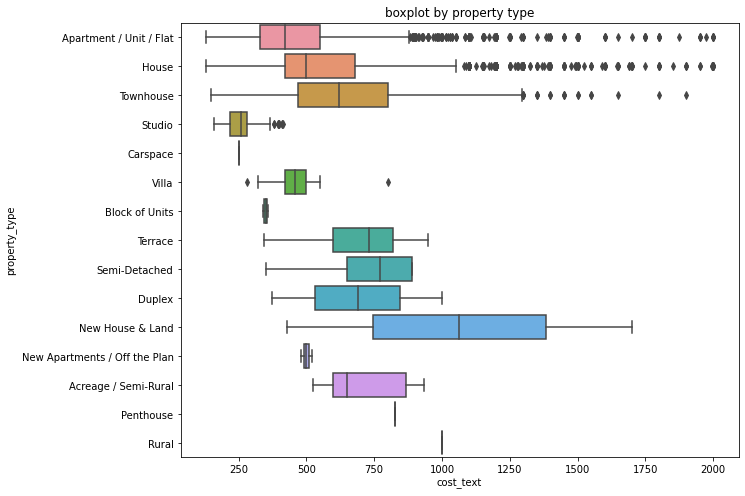

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df5 = pd.read_csv("../data/curated/price_normalised3.csv")
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot( 'cost_text', 'property_type', data=df5, ax=ax, orient='h')
plt.title('boxplot by property type')
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.rc('font', size=15)
plt.savefig('../plots/boxplot2.png')

Above codes produce a boxplot of prices of properties by each property type. From the boxplot (our boxplot is included in the boxplot.ipynb), it can be seen that the feature property_type does have an impact on prices of properties. 

### Prediction model and model performance

### The codes and results for this part are included in the notebook model.ipynb in the notebooks folder.

For the model of prediction, we decided to use neural network as it is quite useful for regression of non-linear correlation with hidden layers. The neural network we decided to built has 2 (avoid over-fitting) hidden layers both having 12 neurons and using Rectified Linear Unit (ReLU) function as the activation function. The ouput layer has only one neuron and linear function as activation function because our aim of the model is regression. There are nine selected features. However, after one-hot encoding the categorical feature property_type, 22 features in total are in the input layer of our neural network model. A graph illustrating the structure of our neural network model was also produced in model.ipynb. 

Moreover, standard scaler from sklearn was used to standardise training data, which significantly improved the performance of the prediction model. Adam was chosen to be the optimizer of the model. Mean squared error was chosen to be the loss function. R square was chosen to be a metrics. The model was trained using batch_size 64 and 197 epochs (we tried some different epochs and found 197 epochs was the best for us).

From the final values of MAE (0.3852) and R2 (0.6209), we can say that performance of the model is acceptable and satisfactory to us. Moreover, a scatter plot of true prices vs predicted prices of properteis in the test dataset (which is 20% of the whole training dataset chosen randomly) was sketched to check performance. From our plot, the performance of the model can still be considered as acceptable.

### Make prediction and calculate growth rate

### The codes and results for this part are also included in the notebook model.ipynb in the notebooks folder.

We then used the model to predict future prices of 2025. However, there is an issue here which can affect the accuracy of the prediction. That is: after getting the standardized values of the predicted prices of 2025 using the model, inverse standardization of those values can be inaccurate because we don't have the real values of future prices and can only use the scaler calculated using the values of current prices for inverse standardization. 